# Preliminary analysis
Data presented on 20180626 using slides: radiogenomics_prelim_20180622.pptx.

## Materials:
- 13 subjects (3 missing at least one timepoint)
- First two timepoints (t1 and t2) subject to analysis
- Manual segmentation performed on the series of the highest resolution
- Extracted radiomic features within the delineated tumor using PyRadiomics
- 2-sample t-Test applied to test the group differences at each timepoint (nothing significant, really)

### PyRadiomics features:
- First Order Statistics (19 features)
- Shape-based (16 features)
- Gray Level Cooccurence Matrix (23 features)
- Gray Level Run Length Matrix (16 features)
- Gray Level Size Zone Matrix (16 features)
- Neigbouring Gray Tone Difference Matrix (5 features)
- Gray Level Dependence Matrix (14 features)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sys,os
from glob import glob

In [2]:
df=pd.read_csv('ctDNA_pyradiomics_v1.3.0_output_20180613.csv', index_col=0)
df_master=pd.read_csv('Initial_Cohort_20180130.csv', index_col=0)

In [3]:
df.head()

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_SmallAreaEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,1520.842205,0.716856,0.003770,6.484645,0.002586,0.000303,0.174422,0.974091,0.895226,0.000003
9-20170227,9,20170227,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,1557.046331,0.727541,0.002243,6.143951,0.001773,0.000440,0.198344,1.485758,0.659196,0.000002
43-20160225,43,20160225,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,848.512911,0.685343,0.002099,6.260697,0.001697,0.000919,0.371566,2.550044,0.390971,0.000002
43-20160705,43,20160705,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,1904.005432,0.747635,0.001298,6.484370,0.001152,0.000966,2.117633,3.436776,0.199281,0.000011
83-20160728,83,20160728,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,1480.871510,0.687982,0.001176,6.004472,0.000961,0.000544,0.192744,1.067521,0.674749,0.000002


In [4]:
df_master.head()

,MRN,Mutation,RECIST
Patient Number,,,
162,1003159262,EGFR T790M,Progressive Disease
83,1004680564,EGFR T790M,Progressive Disease
203,1002830910,EGFR T790M,Progressive Disease
166,1002638882,EGFR T790M,Progressive Disease
43,1002641492,EGFR T790M,Stable Disease


In [5]:
df_master['ResponseGroup']=df_master.RECIST
df_master['ResponseGroup'].replace(to_replace=['Stable Disease', 'Partial Response', 'Progressive Disease'],
                                   value=['Responders', 'Responders', 'Non-Responders'], inplace=True)

In [6]:
df_master.head()

,MRN,Mutation,RECIST,ResponseGroup
Patient Number,,,,
162,1003159262,EGFR T790M,Progressive Disease,Non-Responders
83,1004680564,EGFR T790M,Progressive Disease,Non-Responders
203,1002830910,EGFR T790M,Progressive Disease,Non-Responders
166,1002638882,EGFR T790M,Progressive Disease,Non-Responders
43,1002641492,EGFR T790M,Stable Disease,Responders


In [7]:
df_merged=pd.merge(df, df_master[['Mutation', 'RECIST', 'ResponseGroup']], left_on='PID', right_index=True)

In [8]:
df_merged.head()

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast,Mutation,RECIST,ResponseGroup
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,6.484645,0.002586,0.000303,0.174422,0.974091,0.895226,0.000003,EGFR T790M,Partial Response,Responders
9-20170227,9,20170227,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,6.143951,0.001773,0.000440,0.198344,1.485758,0.659196,0.000002,EGFR T790M,Partial Response,Responders
43-20160225,43,20160225,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,6.260697,0.001697,0.000919,0.371566,2.550044,0.390971,0.000002,EGFR T790M,Stable Disease,Responders
43-20160705,43,20160705,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,6.484370,0.001152,0.000966,2.117633,3.436776,0.199281,0.000011,EGFR T790M,Stable Disease,Responders
83-20160728,83,20160728,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,6.004472,0.000961,0.000544,0.192744,1.067521,0.674749,0.000002,EGFR T790M,Progressive Disease,Non-Responders


In [9]:
cols_features=[i for i in df_merged.columns if 'original' in i]
#cols_features.append('general_info_VoxelNum')
cols_number=['f%d' % i for i in range(1,len(cols_features)+1)]
#cols_number.append()

In [18]:
df_merged.query(condition2)[feature]

Index
83-20160728     0.000002
166-20160426    0.007230
Name: original_ngtdm_Contrast, dtype: float64

In [30]:
def pooled_std(x,y):
    p_std=np.sqrt(((len(x)-1)*np.var(x, ddof = 1)+(len(y)-1)*np.var(y, ddof = 1))/(len(x)+len(y)-2))
    return p_std

def cohens_d(x = None, y = None, t = None):
    if t is None:
        d=(x.mean()-y.mean())/pooled_std(x,y)
    elif t is not None:
        d = t * np.sqrt(1./len(x) + 1./len(y))
    elif x is None and y is None and t is None:
        raise
    return d

In [33]:
condition1='ResponseGroup=="Responders" and Timepoint=="T1"'
condition2='ResponseGroup=="Non-Responders" and Timepoint=="T1"'
condition3='ResponseGroup=="Responders" and Timepoint=="T2"'
condition4='ResponseGroup=="Non-Responders" and Timepoint=="T2"'
p_ttest_t1=np.zeros_like(cols_features, dtype=np.float)
p_ttest_t2=np.zeros_like(p_ttest_t1)
d_ttest_t1=np.zeros_like(p_ttest_t1)
d_ttest_t2=np.zeros_like(p_ttest_t1)

for i, feature in enumerate(cols_features):
    t_1, p_1=stats.ttest_ind(df_merged.query(condition1)[feature], df_merged.query(condition2)[feature])
    t_2, p_2=stats.ttest_ind(df_merged.query(condition3)[feature], df_merged.query(condition4)[feature])
    p_ttest_t1[i]=p_1
    p_ttest_t2[i]=p_2
    d_ttest_t1[i]=cohens_d(x=df_merged.query(condition1)[feature], y=df_merged.query(condition2)[feature], t=t_1)
    d_ttest_t2[i]=cohens_d(x=df_merged.query(condition3)[feature], y=df_merged.query(condition4)[feature], t=t_2)

In [28]:
np.array(cols_features)[p_ttest_t1<0.05], np.array(cols_features)[p_ttest_t2<0.05]

(array(['original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
        'original_ngtdm_Contrast'],
       dtype='|S50'), array([],
       dtype='|S50'))

In [37]:
np.array(cols_features)[np.abs(d_ttest_t1)>1], np.array(cols_features)[np.abs(d_ttest_t2)>1]

(array(['original_shape_Maximum3DDiameter',
        'original_shape_Maximum2DDiameterSlice', 'original_shape_MinorAxis',
        'original_shape_Elongation', 'original_shape_SurfaceVolumeRatio',
        'original_shape_MajorAxis', 'original_shape_LeastAxis',
        'original_shape_Maximum2DDiameterColumn',
        'original_shape_Maximum2DDiameterRow',
        'original_gldm_DependenceEntropy',
        'original_gldm_SmallDependenceEmphasis',
        'original_gldm_DependenceNonUniformityNormalized',
        'original_gldm_DependenceVariance',
        'original_gldm_SmallDependenceLowGrayLevelEmphasis',
        'original_glcm_Imc1',
        'original_glrlm_RunLengthNonUniformityNormalized',
        'original_glszm_SizeZoneNonUniformityNormalized',
        'original_glszm_ZonePercentage', 'original_glszm_ZoneEntropy',
        'original_glszm_SmallAreaLowGrayLevelEmphasis',
        'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
        'original_ngtdm_Strength', 'original_ngt

In [29]:
np.array(cols_features)[p_ttest_t1<0.1], np.array(cols_features)[p_ttest_t2<0.1]

(array(['original_shape_SurfaceVolumeRatio',
        'original_gldm_DependenceEntropy',
        'original_gldm_DependenceNonUniformityNormalized',
        'original_gldm_SmallDependenceLowGrayLevelEmphasis',
        'original_glcm_Imc1', 'original_ngtdm_Coarseness',
        'original_ngtdm_Complexity', 'original_ngtdm_Strength',
        'original_ngtdm_Contrast'],
       dtype='|S50'),
 array(['original_shape_Volume', 'original_firstorder_TotalEnergy'],
       dtype='|S50'))

In [10]:
df_merged_norm=df_merged.copy()
df_merged_norm[cols_features]=stats.zscore(df_merged_norm[cols_features])

In [13]:
df_merged_norm.groupby(['ResponseGroup', 'Timepoint']).describe()

PID                                               \
                         count        mean         std   min     25%    50%   
ResponseGroup  Timepoint                                                      
Non-Responders T1          2.0  124.500000   58.689863  83.0  103.75  124.5   
               T2          2.0  122.500000   55.861436  83.0  102.75  122.5   
Responders     T1          9.0  175.444444  109.495561   9.0  113.00  177.0   
               T2          8.0  183.250000  114.347528   9.0  123.25  199.5   

                                        StudyDate                  ...     \
                             75%    max     count          mean    ...      
ResponseGroup  Timepoint                                           ...      
Non-Responders T1         145.25  166.0       2.0  2.016058e+07    ...      
               T2         142.25  162.0       2.0  2.016086e+07    ...      
Responders     T1         248.00  349.0       9.0  2.016287e+07    ...      
               T2         253.00  349.0       8.0  2.016568e+07    ...      

                         original_shape_SurfaceVolumeRatio            \
                                                       75%       max   
ResponseGroup  Timepoint                                               
Non-Responders T1                                 0.699201  0.958537   
               T2                                 0.157743  0.620502   
Responders     T1                                -0.143171  0.555981   
               T2                                 0.256276  3.794808   

                         original_shape_Volume                                \
                                         count      mean       std       min   
ResponseGroup  Timepoint                                                       
Non-Responders T1                          2.0 -0.514033  0.253310 -0.693150   
               T2                          2.0  1.274781  2.624385 -0.580940   
Responders     T1                          9.0  0.158040  1.019363 -0.610350   
               T2                          8.0 -0.367982  0.304480 -0.702644   

                                                                  
                               25%       50%       75%       max  
ResponseGroup  Timepoint                                          
Non-Responders T1        -0.603591 -0.514033 -0.424474 -0.334915  
               T2         0.346920  1.274781  2.202641  3.130501  
Responders     T1        -0.433420 -0.368302  0.057475  2.435102  
               T2        -0.548988 -0.523665 -0.149180  0.189648  

[4 rows x 936 columns]

In [14]:
pd.crosstab(df_merged.ResponseGroup, df_merged.Timepoint)

Timepoint,T1,T2
ResponseGroup,,
Non-Responders,2,2
Responders,9,8


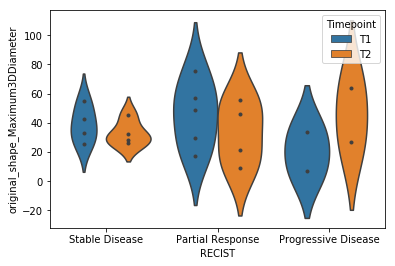

In [15]:
sns.violinplot(x='RECIST', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
               order=['Stable Disease', 'Partial Response', 'Progressive Disease'], hue_order=['T1', 'T2'],
               inner='point')
#sns.stripplot(x='RECIST', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
#              order=['Stable Disease', 'Partial Response', 'Progressive Disease'], hue_order=['T1', 'T2'],
#              jitter=0.1, dodge=True, color='black')

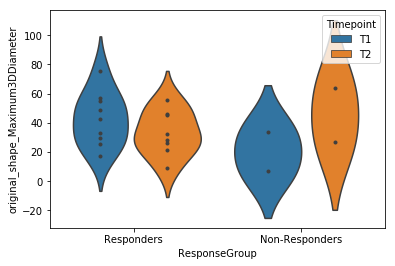

In [17]:
sns.violinplot(x='ResponseGroup', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
               hue_order=['T1', 'T2'], inner='point', legend=False)
#sns.stripplot(x='RECIST', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
#              order=['Stable Disease', 'Partial Response', 'Progressive Disease'], hue_order=['T1', 'T2'],
#              jitter=0.1, dodge=True, color='black')

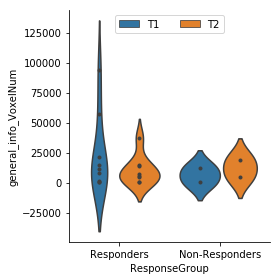

In [42]:
sns.factorplot(x='ResponseGroup', y='general_info_VoxelNum', hue='Timepoint', data=df_merged_norm, 
               hue_order=['T1', 'T2'], kind='violin', inner='point', legend=False)
plt.legend(loc='upper center', ncol=2)


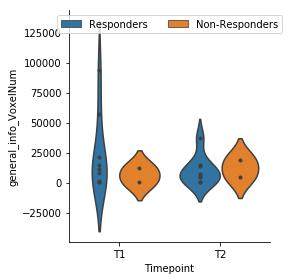

In [41]:
sns.factorplot(x='Timepoint', y='general_info_VoxelNum', hue='ResponseGroup',  data=df_merged_norm, 
               kind='violin', inner='point', legend=False)
plt.legend(loc='upper center', ncol=2)

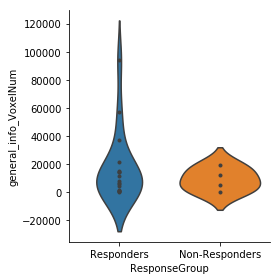

In [40]:
sns.factorplot(y='general_info_VoxelNum', x='ResponseGroup',  data=df_merged_norm, 
               kind='violin', inner='point', legend=False)
plt.legend(loc='upper center', ncol=2)

In [43]:
outdir=os.path.join('figures_20180622', 'violinplots_norm')
try:
    os.makedirs(outdir)
except:
    pass
for feature in cols_features:
    #print feature
    g=sns.factorplot(x='ResponseGroup', y=feature, hue='Timepoint', data=df_merged_norm, 
               hue_order=['T1', 'T2'], kind='violin', inner='point', legend=False)

    g.ax.set_title('%s: %s' % (feature.split('_')[1], feature.split('_')[2]))
    g.ax.set_ylabel('')
    plt.legend(loc='upper center', ncol=2)
    g.fig.savefig(os.path.join(outdir, 'violinplot_%s_%s_by_groups.png' % (feature.split('_')[1], feature.split('_')[2])),
                  dpi=150, bbox_inches='tight')
    plt.close('all')

In [44]:
outdir=os.path.join('figures_20180622', 'violinplots_norm_byTime')
try:
    os.makedirs(outdir)
except:
    pass
for feature in cols_features:
    #print feature
    g=sns.factorplot(hue='ResponseGroup', y=feature, x='Timepoint', data=df_merged_norm, 
                     order=['T1', 'T2'], kind='violin', inner='point', legend=False)

    g.ax.set_title('%s: %s' % (feature.split('_')[1], feature.split('_')[2]))
    g.ax.set_ylabel('')
    plt.legend(loc='upper center', ncol=2)
    g.fig.savefig(os.path.join(outdir, 'violinplot_%s_%s_by_groups.png' % (feature.split('_')[1], feature.split('_')[2])),
                  dpi=150, bbox_inches='tight')
    plt.close('all')

In [45]:
outdir=os.path.join('figures_20180622', 'violinplots_norm_noTime')
try:
    os.makedirs(outdir)
except:
    pass
for feature in cols_features:
    #print feature
    g=sns.factorplot(x='ResponseGroup', y=feature, data=df_merged_norm, 
                     kind='violin', inner='point', legend=False)

    g.ax.set_title('%s: %s' % (feature.split('_')[1], feature.split('_')[2]))
    g.ax.set_ylabel('')
    plt.legend(loc='upper center', ncol=2)
    g.fig.savefig(os.path.join(outdir, 'violinplot_%s_%s_by_groups.png' % (feature.split('_')[1], feature.split('_')[2])),
                  dpi=150, bbox_inches='tight')
    plt.close('all')

In [47]:
df_merged_norm.head(7)

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast,Mutation,RECIST,ResponseGroup
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,0.723704,-0.527495,-0.415699,-0.447909,-0.482064,0.023839,-0.316051,EGFR T790M,Partial Response,Responders
9-20170227,9,20170227,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,0.162086,-0.634487,-0.407908,-0.436999,-0.357741,-0.241134,-0.316424,EGFR T790M,Partial Response,Responders
43-20160225,43,20160225,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,0.354536,-0.644473,-0.380877,-0.358000,-0.099144,-0.542250,-0.316572,EGFR T790M,Stable Disease,Responders
43-20160705,43,20160705,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,0.723250,-0.716284,-0.378227,0.438309,0.116311,-0.757445,-0.310788,EGFR T790M,Stable Disease,Responders
83-20160728,83,20160728,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,-0.067839,-0.741433,-0.402082,-0.439553,-0.459363,-0.223674,-0.316566,EGFR T790M,Progressive Disease,Non-Responders
83-20161111,83,20161111,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(138, 268, 206, 40, 35, 15)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",42f9887b37f87f27d1d660fcfb59271291348344,"(0.61328125, 0.61328125, 1.0)",...,-0.329099,-0.364253,-0.345746,-0.492547,-0.571238,0.138965,-0.314318,EGFR T790M,Progressive Disease,Non-Responders
113-20160804,113,20160804,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(178, 174, 125, 47, 54, 35)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",366cf80d490f3989e83d1f16acaef73c3e4b5cbd,"(0.82421875, 0.82421875, 1.0)",...,1.509224,-0.183121,-0.403733,-0.354843,-0.556887,-0.018612,-0.295907,EGFR T790M,Partial Response,Responders


In [59]:
df.loc['83-20160728', cols_features].shape, len(cols_number), len(cols_features)

((114L,), 114, 114)

In [89]:
index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113])

In [155]:
cols_features

['original_shape_Maximum3DDiameter',
 'original_shape_Compactness2',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Sphericity',
 'original_shape_MinorAxis',
 'original_shape_Compactness1',
 'original_shape_Elongation',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_Volume',
 'original_shape_SphericalDisproportion',
 'original_shape_MajorAxis',
 'original_shape_LeastAxis',
 'original_shape_Flatness',
 'original_shape_SurfaceArea',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_gldm_GrayLevelVariance',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_GrayLevelNonUniformityNormalized',
 'original_gldm_DependenceEntropy',
 'original_gldm_DependenceNonUniformity',
 'original_gldm_GrayLevelNonUniformity',
 'original_gldm_SmallDependenceEmphasis',
 'original_gldm_DependenceNonUniformityNormalized',
 'original_gldm_DependenceVariance',
 'original_gldm_LargeDependenceEmphasis',
 'original_gldm_LargeDependenceLowGrayLevel

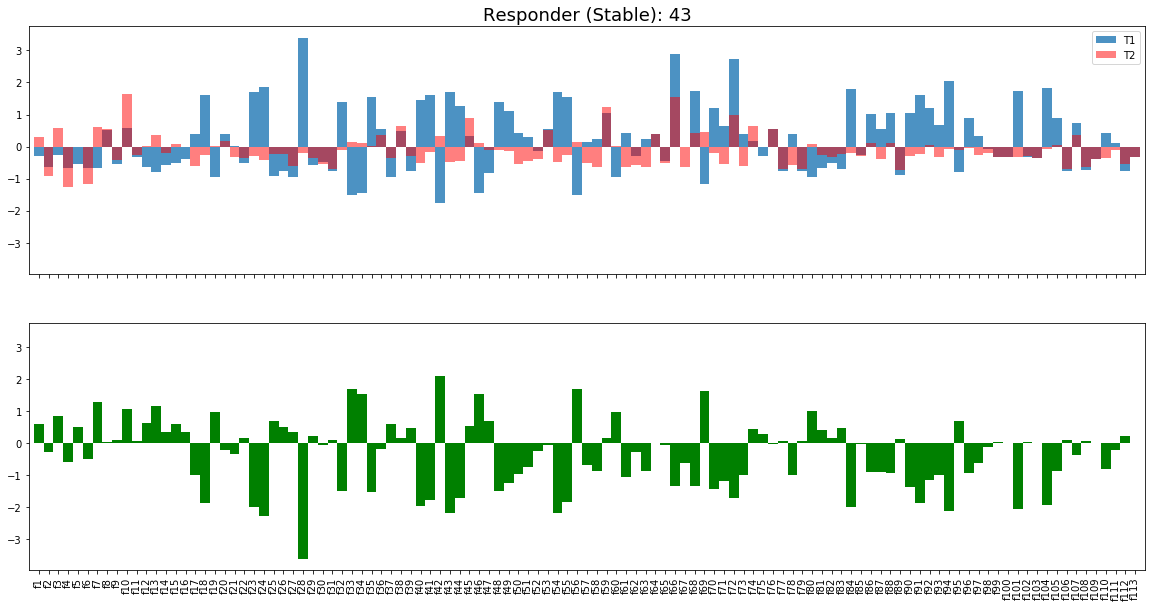

In [156]:
f, ax=plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
title='Responder (Stable): 43'
base=df_merged_norm.loc['43-20160705', cols_features].values.astype(np.float)
follow=df_merged_norm.loc['43-20160225', cols_features].values.astype(np.float)
diff=follow-base
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax[0].bar(index, base, bar_width, label='T1', alpha=0.8)
ax[0].bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax[1].bar(index, diff, bar_width, color='g')
ax[1].set_xticks(index)
ax[1].set_xticklabels(cols_number, rotation=90)
ax[1].set_xlim(index.min()-1, index.max()+1)
ax[0].set_title(title, fontsize=18)
ax[0].legend()
plt.show()

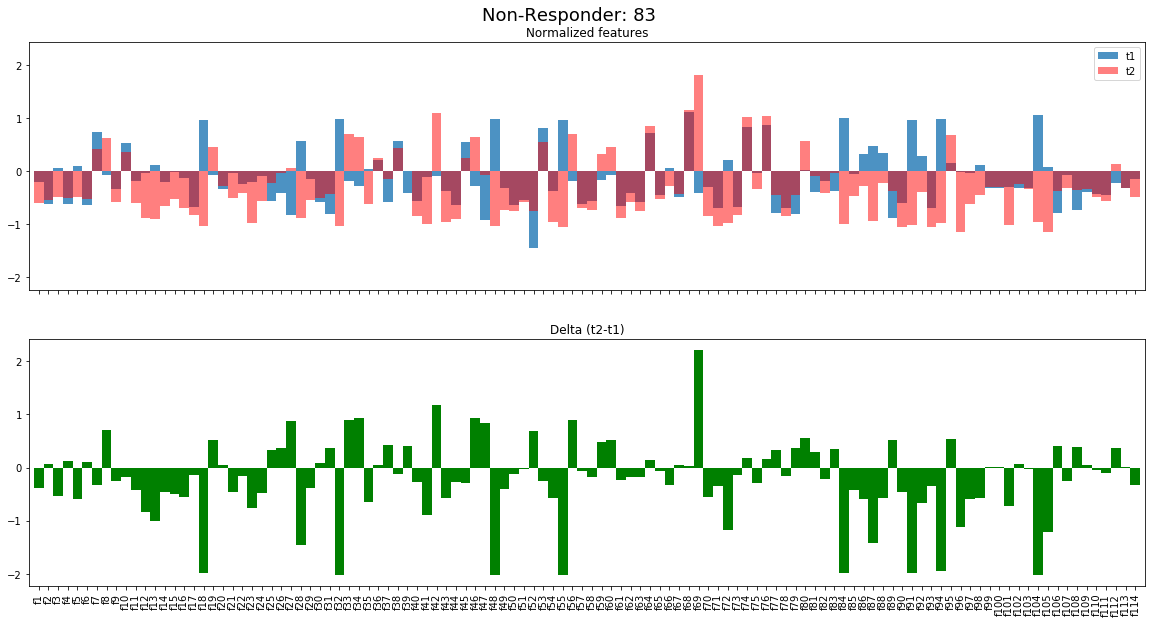

In [151]:
f, ax=plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
title='Non-Responder: 83'
base=df_merged_norm.loc['83-20160728', cols_features].values.astype(np.float)
follow=df_merged_norm.loc['83-20161111', cols_features].values.astype(np.float)
diff=follow-base
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax[0].bar(index, base, bar_width, label='t1', alpha=0.8)
ax[0].bar(index, follow, bar_width, label='t2', color='r', alpha=0.5, )
ax[1].bar(index, diff, bar_width, color='g')
ax[1].set_xticks(index)
ax[1].set_xticklabels(cols_number, rotation=90)
ax[1].set_xlim(index.min()-1, index.max()+1)
ax[0].set_title('Normalized features', fontsize=12)
ax[1].set_title('Delta (t2-t1)', fontsize=12)
f.suptitle(title, fontsize=18, y=.93)
ax[0].legend()
plt.show()

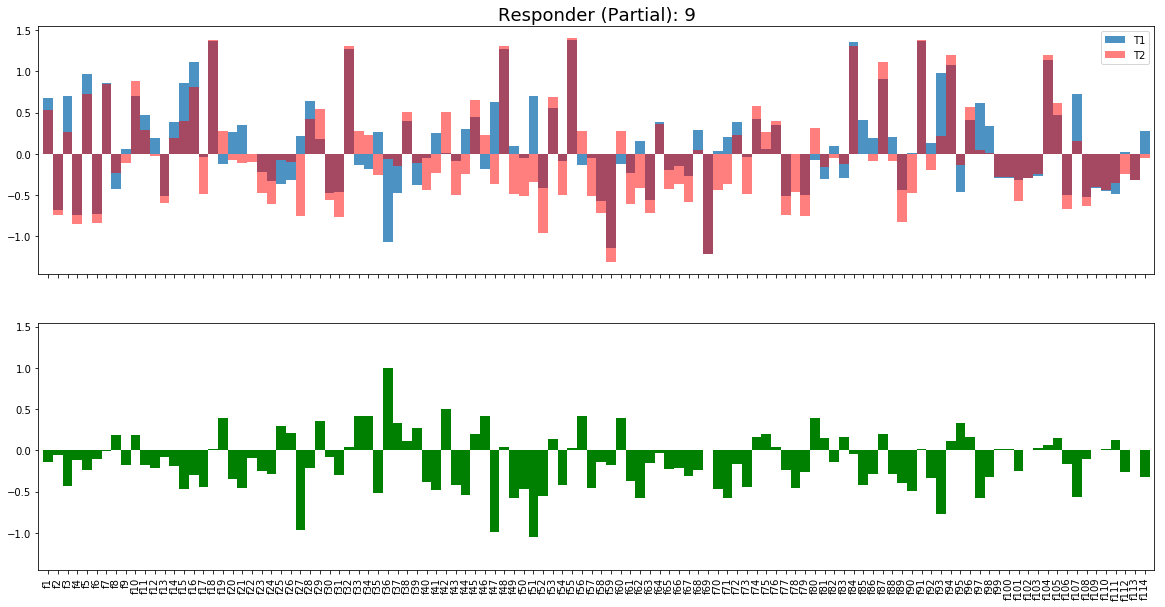

In [142]:
f, ax=plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
title='Responder (Partial): 9'
base=df_merged_norm.loc['9-20160920', cols_features].values.astype(np.float)
follow=df_merged_norm.loc['9-20170227', cols_features].values.astype(np.float)
diff=follow-base
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax[0].bar(index, base, bar_width, label='T1', alpha=0.8)
ax[0].bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax[1].bar(index, diff, bar_width, color='g')
ax[1].set_xticks(index)
ax[1].set_xticklabels(cols_number, rotation=90)
ax[1].set_xlim(index.min()-1, index.max()+1)
ax[0].set_title(title, fontsize=18)
ax[0].legend()
plt.show()

```python
gldm 15
glcm 26
shape 16
firstorder 19
glrlm 16
glszm 16
ngtdm 5
```

In [163]:
from collections import OrderedDict
d_feature_family=OrderedDict()
for i in cols_features:
    a=i.split('_')[1]
    if a not in d_feature_family:
        d_feature_family[a]=1
    else:
        d_feature_family[a]+=1

In [164]:
d_feature_family

OrderedDict([('shape', 16),
             ('gldm', 15),
             ('glcm', 26),
             ('firstorder', 19),
             ('glrlm', 16),
             ('glszm', 16),
             ('ngtdm', 5)])

In [181]:
xtick_loc=[]
xlines_loc=[]
current=0
for v in d_feature_family.itervalues():
    mid=v/2
    xtick_loc.append(current+mid)
    current+=v
    xlines_loc.append(current-0.5)

In [182]:
xtick_loc, xlines_loc

([8, 23, 44, 66, 84, 100, 110], [15.5, 30.5, 56.5, 75.5, 91.5, 107.5, 112.5])

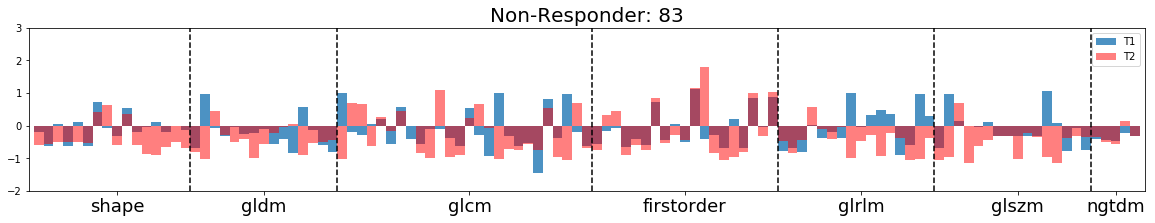

In [197]:
outdir=os.path.join('figures_20180622')
try:
    os.makedirs(outdir)
except:
    pass

subj=83
ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
diff=follow-base

f, ax=plt.subplots(1,1, figsize=(20,3), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, base, bar_width, label='T1', alpha=0.8)
ax.bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 3, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=18)
ax.set_ylim(-2, 3)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Non-Responder: 83', fontsize=20)
ax.legend()
f.savefig(os.path.join(outdir,'feature_barplots_83_nonresponder.png'), dpt=150, bbox_inches='tight')

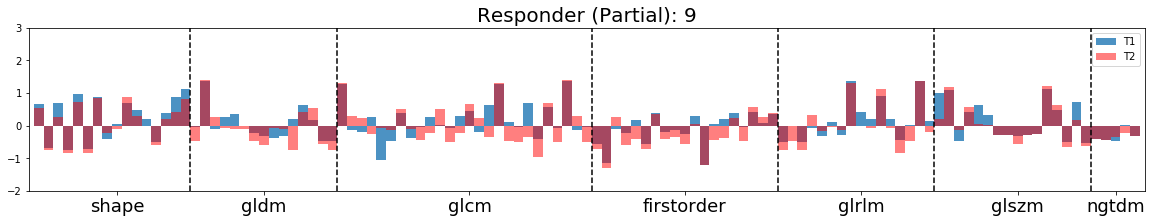

In [195]:
outdir=os.path.join('figures_20180622')
try:
    os.makedirs(outdir)
except:
    pass

subj=9
ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
diff=follow-base

f, ax=plt.subplots(1,1, figsize=(20,3), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, base, bar_width, label='T1', alpha=0.8)
ax.bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 3, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=18)
ax.set_ylim(-2, 3)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (Partial): 9', fontsize=20)
ax.legend()
f.savefig(os.path.join(outdir,'feature_barplots_9_repsponder.png'), dpt=150, bbox_inches='tight')

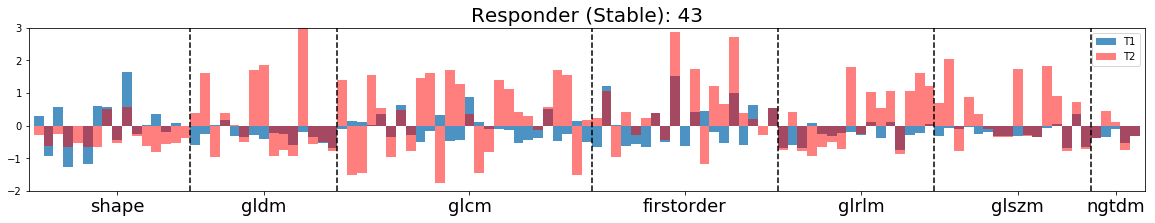

In [196]:
outdir=os.path.join('figures_20180622')
try:
    os.makedirs(outdir)
except:
    pass

subj=43
ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
diff=follow-base

f, ax=plt.subplots(1,1, figsize=(20,3), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, base, bar_width, label='T1', alpha=0.8)
ax.bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 3, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=18)
ax.set_ylim(-2, 3)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (Stable): 43', fontsize=20)
ax.legend()
f.savefig(os.path.join(outdir,'feature_barplots_43_repsponder.png'), dpt=150, bbox_inches='tight')

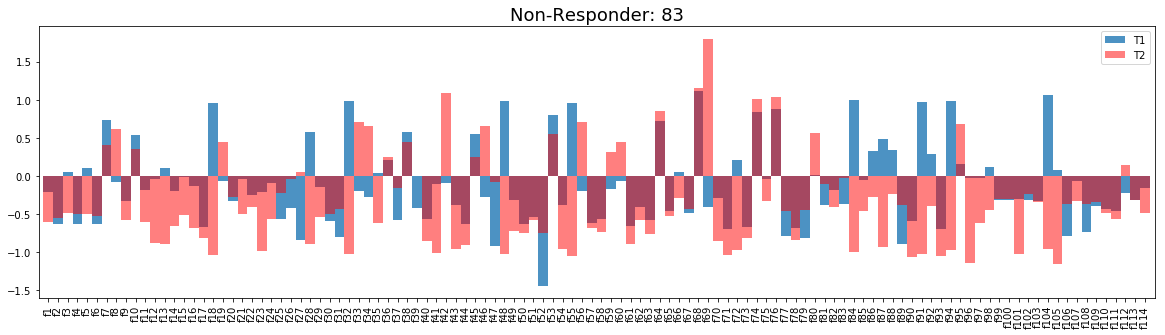

In [132]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, df_merged_norm.loc['83-20160728', cols_features].values.astype(np.float), bar_width,
       label='T1', alpha=0.8)
ax.bar(index, df_merged_norm.loc['83-20161111', cols_features].values.astype(np.float), bar_width,
       label='T2', color='r', alpha=0.5, )
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Non-Responder: 83', fontsize=18)
ax.legend()
plt.show()

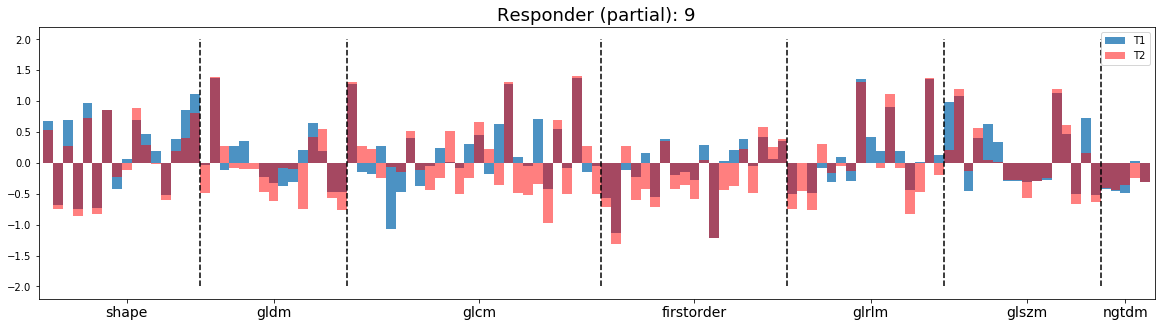

In [186]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, df_merged_norm.loc['9-20160920', cols_features].values.astype(np.float), bar_width,
       label='T1', alpha=0.8)
ax.bar(index, df_merged_norm.loc['9-20170227', cols_features].values.astype(np.float), bar_width,
       label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 2, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=14)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (partial): 9', fontsize=18)
ax.legend()
plt.show()

In [217]:
d_feature={}
for feature in cols_features:
    key=feature.split('_')[1]
    #value=feature.split('_')[-1]
    if key in d_feature:
        d_feature[key].append(feature)
    else:
        d_feature[key]=[feature]

In [218]:
d_feature

{'firstorder': ['original_firstorder_InterquartileRange',
  'original_firstorder_Skewness',
  'original_firstorder_Uniformity',
  'original_firstorder_MeanAbsoluteDeviation',
  'original_firstorder_Energy',
  'original_firstorder_RobustMeanAbsoluteDeviation',
  'original_firstorder_Median',
  'original_firstorder_TotalEnergy',
  'original_firstorder_Maximum',
  'original_firstorder_RootMeanSquared',
  'original_firstorder_90Percentile',
  'original_firstorder_Minimum',
  'original_firstorder_Entropy',
  'original_firstorder_StandardDeviation',
  'original_firstorder_Range',
  'original_firstorder_Variance',
  'original_firstorder_10Percentile',
  'original_firstorder_Kurtosis',
  'original_firstorder_Mean'],
 'glcm': ['original_glcm_JointAverage',
  'original_glcm_Homogeneity1',
  'original_glcm_Homogeneity2',
  'original_glcm_JointEntropy',
  'original_glcm_ClusterShade',
  'original_glcm_MaximumProbability',
  'original_glcm_Idmn',
  'original_glcm_JointEnergy',
  'original_glcm_Cont

In [212]:
df_melt.Feature.unique()

array(['original_ngtdm_Contrast'], dtype=object)

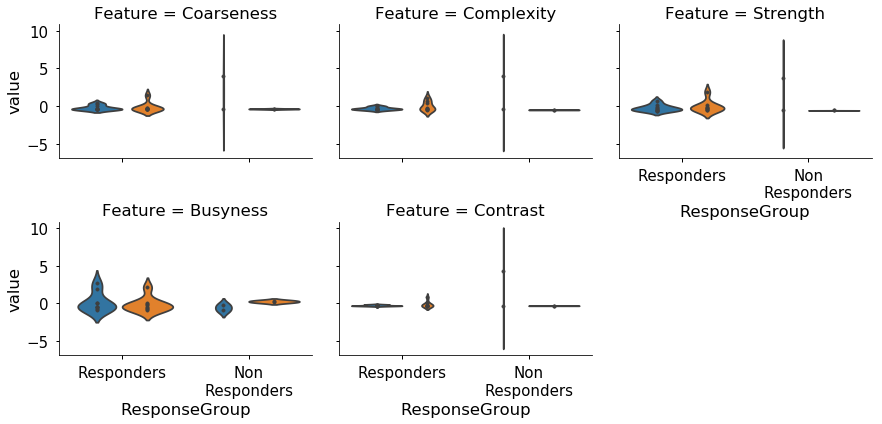

In [257]:
with sns.plotting_context("notebook", font_scale=1.5):
    g=sns.factorplot(x='ResponseGroup', y='value', hue='Timepoint', col='Feature', col_wrap=3, data=df_melt, 
                   hue_order=['t1', 't2'], kind='violin', inner='point', legend=False, size=3, aspect=1.4)
    g.set_xticklabels(['Responders', 'Non\nResponders'])

In [258]:
outdir=os.path.join('figures_20180622', 'violinplots_norm')
try:
    os.makedirs(outdir)
except:
    pass

with sns.plotting_context("notebook", font_scale=1.5):
    for key, features in d_feature.iteritems():
        #print key, features
        df_melt=pd.melt(df_merged_norm, id_vars=['PID', 'Timepoint', 'ResponseGroup'], value_vars=features, var_name='Feature')
        features_short=[i.split('_')[-1] for i in features]
        df_melt['Feature'].replace(to_replace=features, value=features_short, inplace=True)
        df_melt['Timepoint'].replace(to_replace=['T1', 'T2'], value=['t1', 't2'], inplace=True)
        g=sns.factorplot(x='ResponseGroup', y='value', hue='Timepoint', col='Feature', col_wrap=5, data=df_melt, 
                         hue_order=['t1', 't2'], kind='violin', inner='point', size=3, aspect=1.4)
        g.set_titles("{col_name}").set_xticklabels(['Responders', 'Non\nResponders'])
        g.fig.savefig(os.path.join(outdir, 'violinplot_%s_by_groups.png'%key), dpi=150)
        plt.close('all')

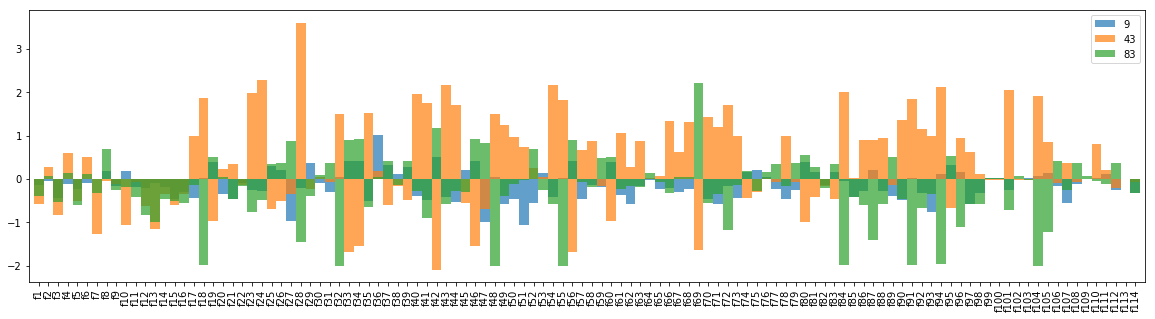

In [146]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
subj_list=[9, 43, 83]
for i, subj in enumerate(subj_list):
    ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
    base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
    follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
    diff=follow-base
    ax.bar(index, diff, bar_width, label=subj, alpha=0.7)
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
#ax.set_title('Responder (partial): 9', fontsize=18)
ax.legend()
plt.show()

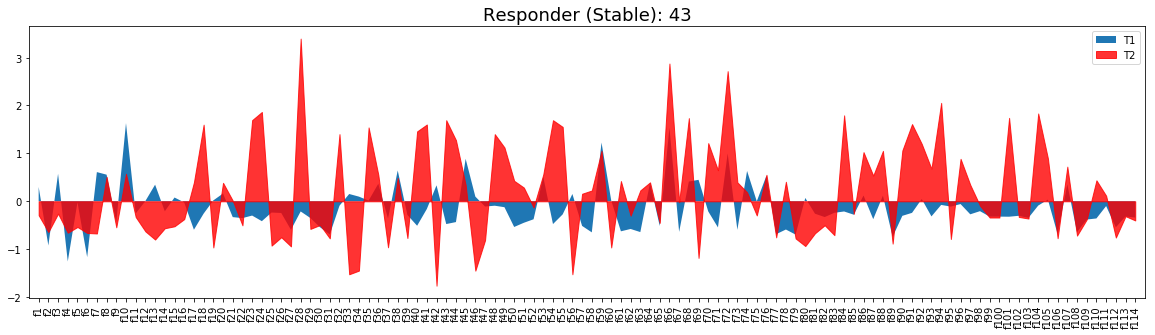

In [121]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number), dtype=np.float)
bar_width=0.6
#spacing=bar_width+0.2
ax.fill_between(index, 0, df_merged_norm.loc['43-20160225', cols_features].values.astype(np.float),
                label='T1')
ax.fill_between(index, 0, df_merged_norm.loc['43-20160705', cols_features].values.astype(np.float), 
                label='T2', color='r', alpha=0.8, )
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (Stable): 43', fontsize=18)
ax.legend()
plt.show()

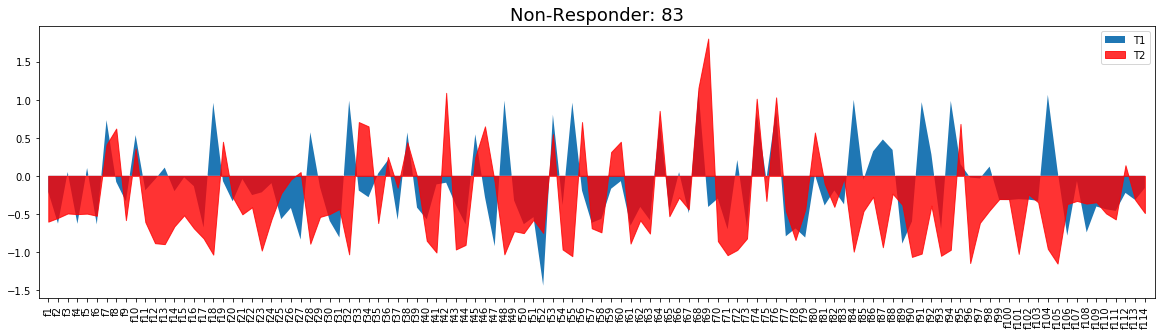

In [123]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number), dtype=np.float)
bar_width=0.6
#spacing=bar_width+0.2
ax.fill_between(index, 0, df_merged_norm.loc['83-20160728', cols_features].values.astype(np.float),
                label='T1')
ax.fill_between(index, 0, df_merged_norm.loc['83-20161111', cols_features].values.astype(np.float), 
                label='T2', color='r', alpha=0.8, )
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Non-Responder: 83', fontsize=18)
ax.legend()
plt.show()

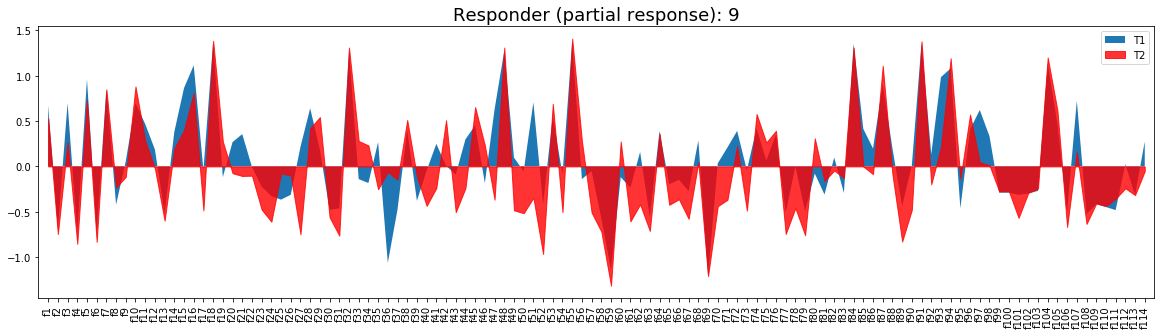

In [120]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number), dtype=np.float)
bar_width=0.6
#spacing=bar_width+0.2
ax.fill_between(index, 0, df_merged_norm.loc['9-20160920', cols_features].values.astype(np.float), 
                label='T1')
ax.fill_between(index, 0, df_merged_norm.loc['9-20170227', cols_features].values.astype(np.float), 
                color='r', alpha=0.8, label='T2')
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (partial response): 9', fontsize=18)
ax.legend()
plt.show()